In [38]:
import numpy as np ;
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

In [26]:
# dataset = pd.read_csv("September_MyCall_2023.csv")
dataset = [11,10,12,13,14,107,15,16,120,166,15,17,18,19,20,21,22,10,11,50,60,59,6,120,119]


(array([16.,  1.,  1.,  2.,  0.,  0.,  1.,  3.,  0.,  1.]),
 array([  6.,  22.,  38.,  54.,  70.,  86., 102., 118., 134., 150., 166.]),
 <BarContainer object of 10 artists>)

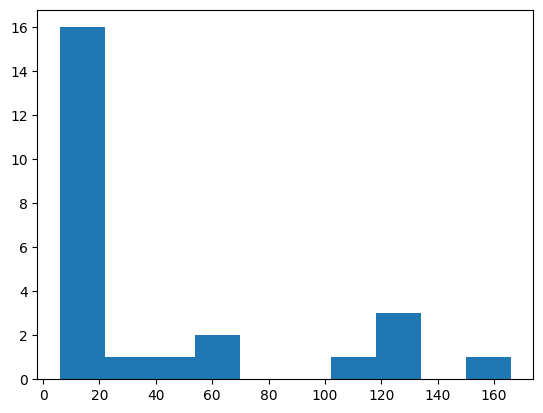

In [27]:
plt.hist(dataset)

<u><b>Detecting outliers</b></u>
    <ul>Using Z-score </ul>

In [23]:
outliers  = []
def detect_outliers (data):
    threshold = 3 # 3rd Standard deviation
    mean = np.mean(data)
    std = np.std(data)
    for i in data :
        z_score = (i - mean) / std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

<Axes: >

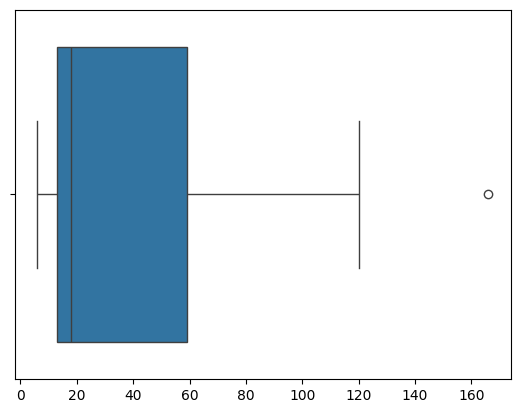

In [53]:

detect_outliers(dataset)
sb.boxplot(dataset,orient="h")

<h2> Using <u>IQR</u> (inter quantile range) </h2>

<ol> 
    <li><b> sort the data </b> </li>
    <li><b> calulate Q1(25%) ,Q3(75%) </b> </li>
    <li> <b>IQR(Q3-Q1)</b> </li>
    <li> <b>Find the lower limit (q1-1.5(iqr))</b> </li>
    <li> <b>Find the upper limit (q3+1.5(iqr))</b> </li>
</ol>

In [30]:
dataset.sort()

In [54]:
#2
Q1,Q3 = np.percentile(dataset,[25,75],interpolation="midpoint")
Q1,Q3

(13.0, 59.0)

In [55]:
IQR = Q3-Q1
IQR

46.0

In [56]:
#3
lower_limit = Q1 - (1.5 *IQR)
upper_limit = Q3 + (1.5*IQR)
lower_limit,upper_limit

(-56.0, 128.0)

<Axes: >

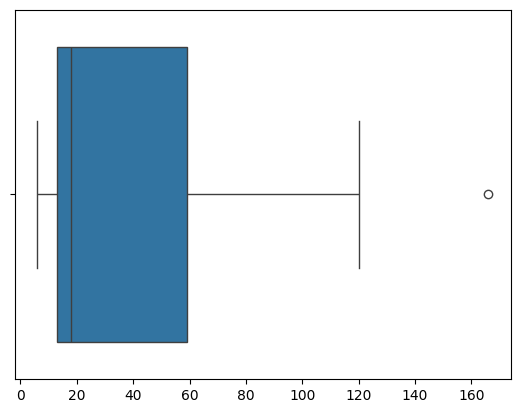

In [57]:
sb.boxplot(dataset , orient="h")